<a href="https://colab.research.google.com/github/HarishniD/LEARNFLOW/blob/main/Health_Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [2]:
import zipfile
import pandas as pd

# Extracting the zip file
with zipfile.ZipFile('/DS task 3.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

# Loading the data from the specific CSV file
insurance_dataset = pd.read_csv('extracted_files/insurance2.csv')  # or 'insurance3r2.csv'


In [3]:
with zipfile.ZipFile('/DS task 3.zip', 'r') as zip_ref:
    print(zip_ref.namelist())


['insurance2.csv', 'insurance3r2.csv']


In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
insurance_dataset.shape

(1338, 8)

In [6]:
#getting some informations from dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


Categorical features
-Sex
-Smoker
-Region

In [7]:
#checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
insuranceclaim,0


Data Analysis

In [8]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


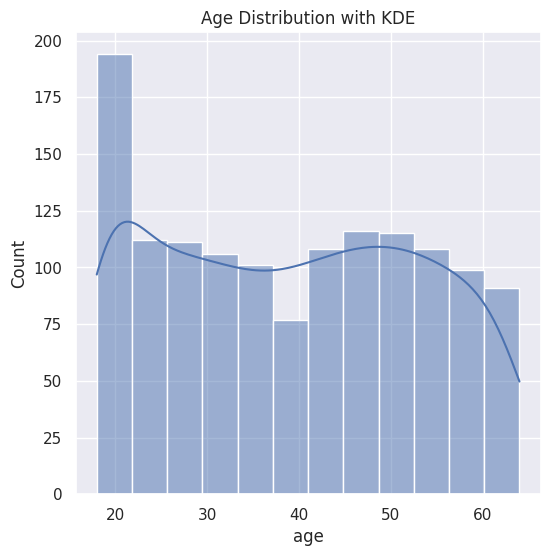

In [9]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution with KDE')
plt.show()

<ipython-input-10-6289d74466a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=insurance_dataset,palette='Set2')


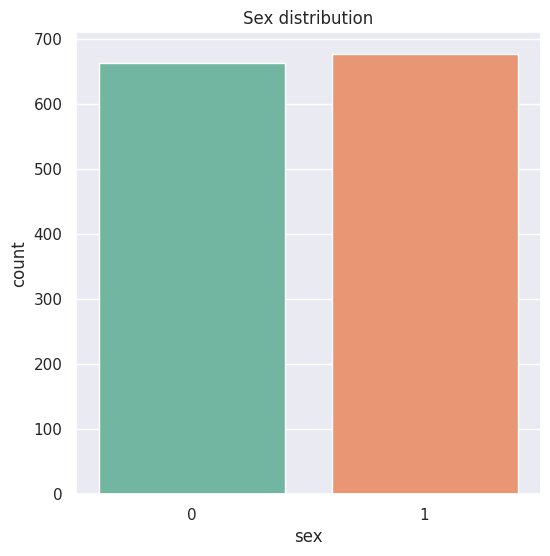

In [10]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset,palette='Set2')
plt.title('Sex distribution')
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

,count
sex,
1,676
0,662


<ipython-input-12-c0151baac55d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'], kde=True)


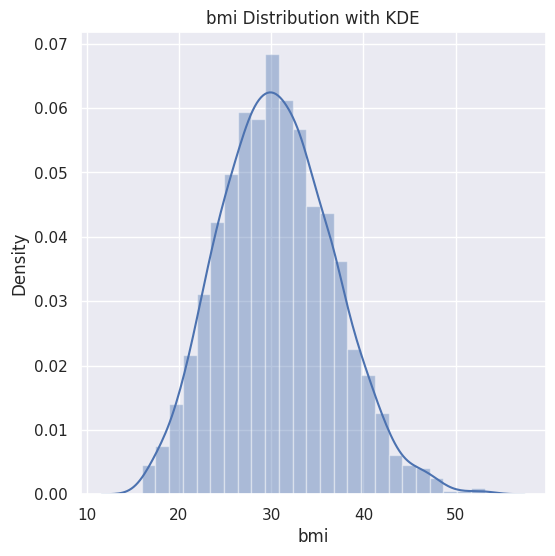

In [12]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'], kde=True)
plt.title('bmi Distribution with KDE')
plt.show()

Normal bmi range-18.9 to 24.9

<ipython-input-13-58ac1d007e6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children',data=insurance_dataset,palette='Set2')


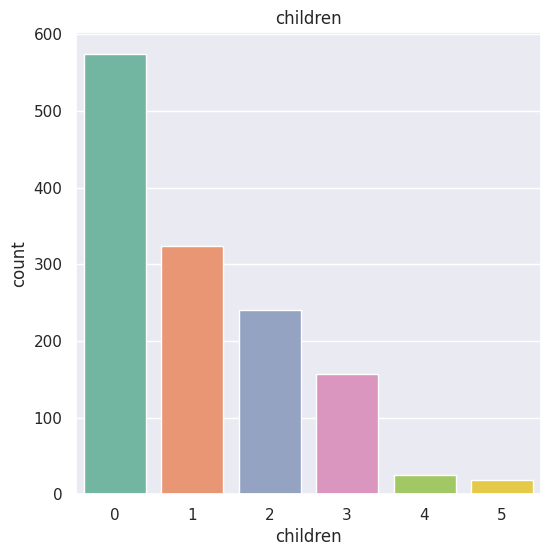

In [13]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset,palette='Set2')
plt.title('children')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<ipython-input-15-30ff19c92f7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=insurance_dataset, palette=colors)


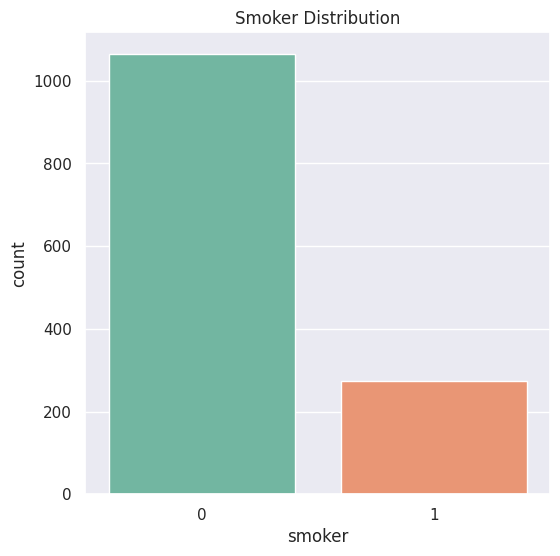

In [15]:
#smoker column
plt.figure(figsize=(6,6))
colors = sns.color_palette('Set2', n_colors=len(insurance_dataset['smoker'].unique()))
sns.countplot(x='smoker', data=insurance_dataset, palette=colors)
plt.title('Smoker Distribution')
plt.show()

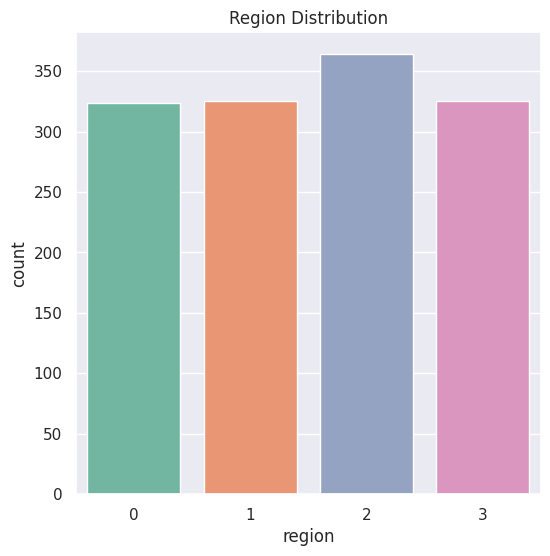

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', hue='region', data=insurance_dataset, palette='Set2', dodge=False, legend=False)
plt.title('Region Distribution')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

,count
region,
2,364
3,325
1,325
0,324


<Figure size 600x600 with 0 Axes>

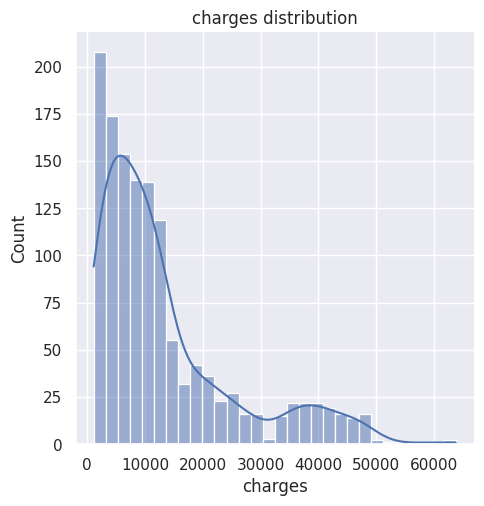

In [18]:
#distribution of charges value
plt.figure(figsize=(6,6))
sns.displot( insurance_dataset['charges'],kde=True)
plt.title('charges distribution')
plt.show()

Data preprocessing


Encoding categorical features

In [19]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)




splitting the features and target


In [20]:
x=insurance_dataset.drop(columns='charges',axis=1)
y=insurance_dataset['charges']

In [21]:
print(x)

      age  sex     bmi  children  smoker  region  insuranceclaim
0      19    0  27.900         0       1       3               1
1      18    1  33.770         1       0       2               1
2      28    1  33.000         3       0       2               0
3      33    1  22.705         0       0       1               0
4      32    1  28.880         0       0       1               1
...   ...  ...     ...       ...     ...     ...             ...
1333   50    1  30.970         3       0       1               0
1334   18    0  31.920         0       0       0               1
1335   18    0  36.850         0       0       2               1
1336   21    0  25.800         0       0       3               0
1337   61    0  29.070         0       1       1               1

[1338 rows x 7 columns]


In [22]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


splitting the data into training and testing data

In [23]:
x_train,x_test,y_train,y_test= train_test_split (x,y, test_size=0.2,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 7) (1070, 7) (268, 7)


Model Training

In [27]:
#loading the linear regression model
regressor=LinearRegression()

In [28]:
regressor.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [29]:
#prediction of training data
training_data_prediction=regressor.predict(x_train)

In [31]:
#R square value
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.7541695960376742


In [32]:
#prediction of test data
test_data_prediction=regressor.predict(x_test)

In [33]:
#R square value
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7456071694626727


Building a predictive system

In [40]:
input_data = (28, 1, 33, 3, 0, 2)

# Adding a placeholder value for the missing feature
# Modify this based on your model's feature requirements
input_data_adjusted = input_data + (0,)  # Add a placeholder value

# Convert to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data_adjusted).reshape(1, -1)

# Predict
prediction = regressor.predict(input_data_as_numpy_array)
print('The insurance cost USD', prediction[0])

The insurance cost USD 7594.632959873525


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
